In [207]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import seaborn as sns

In [208]:
X = 1000
dataFrame = pd.read_csv("Data/processed_dataset.csv")
dataFrame.head()

,Unnamed: 0,Make,Model,Engine Size(L),Cylinders,Fuel Consumption(Hwy (L/100 km)),Drag coefficient
0,0,Acura,ILX,2.4,4,7.0,0.30
1,1,Acura,MDX SH-AWD,3.5,6,9.4,0.37
2,2,Acura,RDX SH-AWD,2.0,4,8.6,0.37
3,3,Acura,RDX SH-AWD A-SPEC,2.0,4,9.1,0.37
4,4,Acura,TLX SH-AWD,2.0,4,8.0,0.30


In [209]:
dataFrame = dataFrame.sort_values(by ='Engine Size(L)')
print(dataFrame.dtypes)

Unnamed: 0                            int64
Make                                 object
Model                                object
Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption(Hwy (L/100 km))    float64
Drag coefficient                    float64
dtype: object


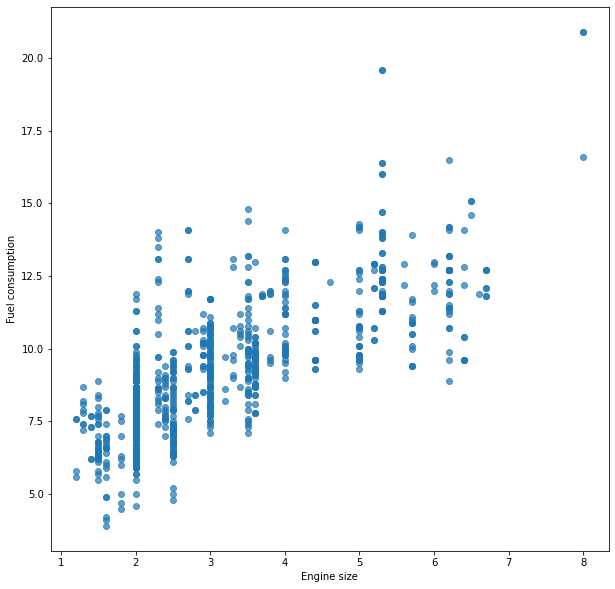

In [210]:
plt.figure(0,figsize=(10,10))
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'],alpha=0.7,marker='o')
plt.xlabel('Engine size')
plt.ylabel('Fuel consumption')
plt.show()

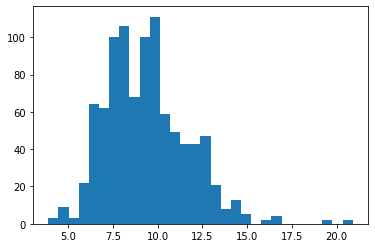

In [211]:
plt.hist(dataFrame["Fuel Consumption(Hwy (L/100 km))"],bins=30)
plt.show()

In [212]:
N = dataFrame.shape[0]
engine_size_data = dataFrame['Engine Size(L)']
cylinders_data = dataFrame['Cylinders']
drag_coeficient_data = dataFrame['Drag coefficient']
fuel_consumption_data = dataFrame['Fuel Consumption(Hwy (L/100 km))']


In [213]:
model_1_prior=CmdStanModel(stan_file='Stan_files/model_1_prior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [214]:
samples_1_prior = model_1_prior.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data},
iter_sampling=X,
iter_warmup=2000,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [215]:
dataFrame_model_1_prior = samples_1_prior.draws_pd()
dataFrame_model_1_prior.head()


,lp__,accept_stat__,alpha,beta_engine_size,beta_drag_coeficient,sigma,fuel_consumption[1],fuel_consumption[2],fuel_consumption[3],fuel_consumption[4],...,fuel_consumption[937],fuel_consumption[938],fuel_consumption[939],fuel_consumption[940],fuel_consumption[941],fuel_consumption[942],fuel_consumption[943],fuel_consumption[944],fuel_consumption[945],fuel_consumption[946]
0,0.0,0.0,16.62450,0.777181,-1.272270,2.12759,14.219300,17.69920,19.63680,21.90610,...,20.406100,18.83970,18.16190,17.89070,19.540900,23.55080,17.61950,18.74150,21.96760,22.95120
1,0.0,0.0,9.20844,0.457312,1.612690,1.78319,8.261550,13.33030,10.01320,14.59050,...,13.265400,11.93500,12.94670,12.44340,10.602100,11.53920,10.92580,12.79570,15.70010,9.50178
2,0.0,0.0,11.39010,0.912026,0.124858,2.58373,10.631000,15.24460,11.60650,11.96390,...,15.706100,21.72380,11.22340,14.73820,22.894600,16.24850,18.97400,20.04550,18.86400,17.94530
3,0.0,0.0,4.86689,-1.070230,-0.144217,1.24137,4.307780,4.17699,4.05143,6.20245,...,-0.215623,-1.59657,-2.81835,-1.64551,-0.555411,-1.32529,-1.41059,-2.95079,-3.42595,-3.90517
4,0.0,0.0,9.68974,0.517820,-0.533935,3.48873,0.833877,9.92886,1.92590,11.34880,...,11.033600,8.47153,12.38590,15.48150,11.702000,8.72725,8.09934,10.25610,11.87680,13.21150


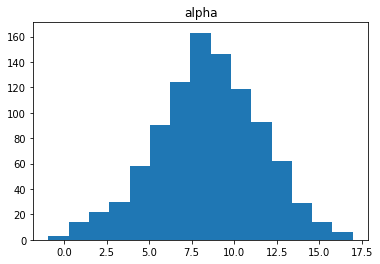

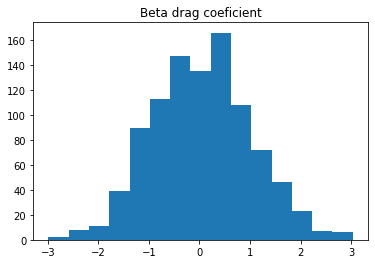

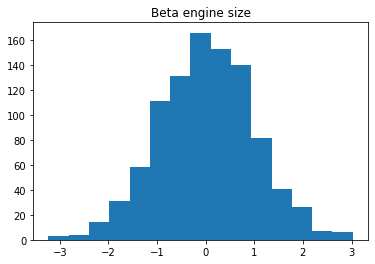

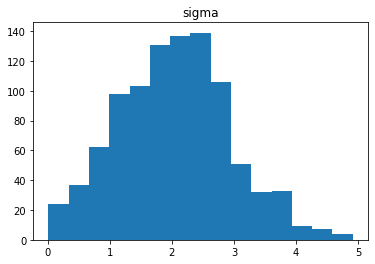

In [216]:

plt.figure(0)
plt.hist(dataFrame_model_1_prior.alpha,bins=15)
plt.title('alpha')
plt.figure(1)
plt.hist(dataFrame_model_1_prior.beta_drag_coeficient,bins=15)
plt.title('Beta drag coeficient')
plt.figure(2)
plt.hist(dataFrame_model_1_prior.beta_engine_size,bins=15)
plt.title('Beta engine size')
plt.figure(3)
plt.hist(dataFrame_model_1_prior.sigma,bins=15)
plt.title('sigma')
plt.show()

In [217]:
model_1_post=CmdStanModel(stan_file='Stan_files/model_1_post.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [218]:
samples_1_post = model_1_post.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data, 'fuel_consumption':fuel_consumption_data},
iter_sampling=X,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [219]:
dataFrame_model_1_post = samples_1_post.draws_pd()
dataFrame_model_1_post.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_engine_size,beta_drag_coeficient,...,log_lik[937],log_lik[938],log_lik[939],log_lik[940],log_lik[941],log_lik[942],log_lik[943],log_lik[944],log_lik[945],log_lik[946]
0,-824.288,0.923105,0.124811,5.0,31.0,0.0,825.315,2.52226,1.16566,8.65204,...,-1.60873,-1.29364,-1.29364,-1.29364,-1.60873,-1.66003,-1.66003,-11.0778,-2.21062,-11.0778
1,-826.125,0.995994,0.124811,4.0,15.0,0.0,826.642,2.31912,1.19302,9.01978,...,-1.67186,-1.30287,-1.30287,-1.30287,-1.67186,-1.72246,-1.72246,-10.8661,-2.09060,-10.8661
2,-823.741,0.999437,0.124811,5.0,31.0,0.0,827.745,2.93577,1.10952,8.01136,...,-1.49845,-1.24740,-1.24740,-1.24740,-1.49845,-1.55346,-1.55346,-12.3542,-2.49906,-12.3542
3,-824.089,0.920823,0.124811,3.0,7.0,0.0,824.396,2.91990,1.11037,8.16847,...,-1.52205,-1.25266,-1.25266,-1.25266,-1.52205,-1.57689,-1.57689,-12.1927,-2.44976,-12.1927
4,-822.865,0.987827,0.124811,4.0,15.0,0.0,824.324,2.91499,1.12437,7.97157,...,-1.54129,-1.27257,-1.27257,-1.27257,-1.54129,-1.59827,-1.59827,-11.7019,-2.37964,-11.7019


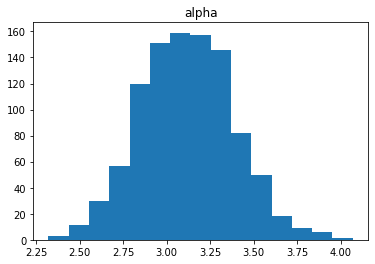

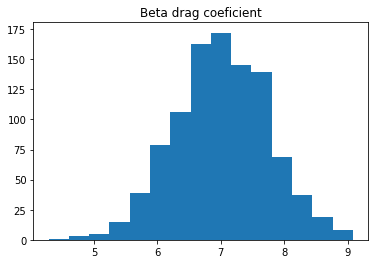

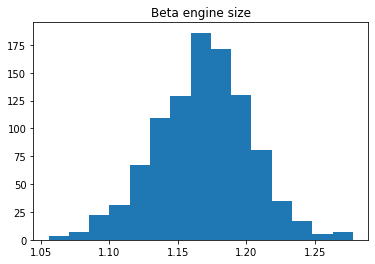

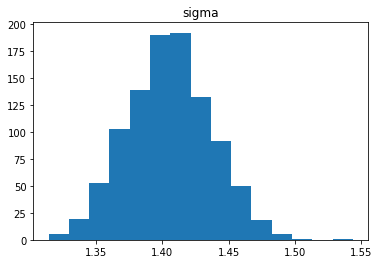

In [220]:

plt.figure(0)
plt.hist(dataFrame_model_1_post.alpha,bins=15)
plt.title('alpha')
plt.figure(1)
plt.hist(dataFrame_model_1_post.beta_drag_coeficient,bins=15)
plt.title('Beta drag coeficient')
plt.figure(2)
plt.hist(dataFrame_model_1_post.beta_engine_size,bins=15)
plt.title('Beta engine size')
plt.figure(3)
plt.hist(dataFrame_model_1_post.sigma,bins=15)
plt.title('sigma')
plt.show()

In [221]:
model_2_prior=CmdStanModel(stan_file='Stan_files/model_2_prior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [222]:
samples_2_prior = model_2_prior.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data},
iter_sampling=X,
iter_warmup=2000,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [223]:
dataFrame_model_2_prior = samples_2_prior.draws_pd()
dataFrame_model_2_prior.head()

,lp__,accept_stat__,alpha,beta_engine_size,beta_cylinders,beta_drag_coeficient,sigma,fuel_consumption[1],fuel_consumption[2],fuel_consumption[3],...,fuel_consumption[937],fuel_consumption[938],fuel_consumption[939],fuel_consumption[940],fuel_consumption[941],fuel_consumption[942],fuel_consumption[943],fuel_consumption[944],fuel_consumption[945],fuel_consumption[946]
0,0.0,0.0,15.56170,0.777181,-1.272270,0.127591,0.610578,12.8661,13.44770,14.10790,...,4.80138,4.60367,4.52583,5.00854,6.15338,4.44800,4.48370,1.332080,1.61435,1.60852
1,0.0,0.0,10.40720,1.612690,-0.216814,-1.110080,3.732450,10.6459,20.22670,9.99742,...,18.58110,17.55530,13.61680,15.66270,14.35110,17.01470,23.09390,11.338100,23.07460,22.88300
2,0.0,0.0,9.64592,0.583732,-0.731857,1.053750,1.642290,8.1067,8.07443,7.35987,...,3.35202,8.50812,4.28571,6.01806,5.97109,5.19374,4.60976,0.959668,1.19092,2.71169
3,0.0,0.0,7.62273,0.619019,0.513660,0.420648,4.153430,10.6271,17.21410,12.89560,...,24.09050,21.49200,21.20660,20.71320,19.13390,17.52000,19.71380,23.080900,18.71250,27.11350
4,0.0,0.0,3.24429,-0.063658,-2.346890,0.354059,3.067050,-5.8178,-2.27531,-3.42769,...,-28.97290,-29.53370,-28.22480,-26.80000,-25.61770,-20.55020,-21.53850,-38.088500,-37.77560,-34.07940


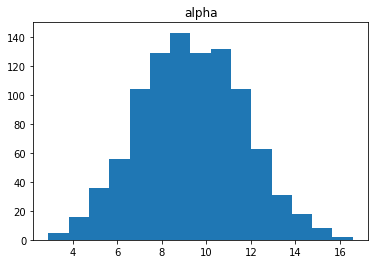

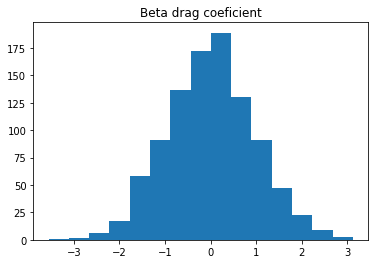

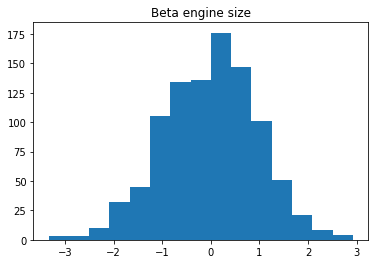

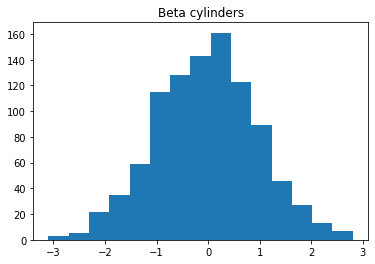

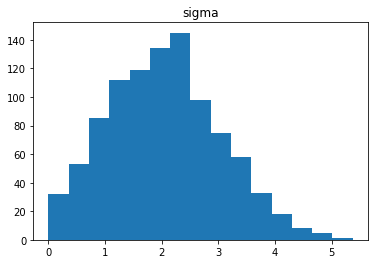

In [224]:
plt.figure(0)
plt.hist(dataFrame_model_2_prior.alpha,bins=15)
plt.title('alpha')
plt.figure(1)
plt.hist(dataFrame_model_2_prior.beta_drag_coeficient,bins=15)
plt.title('Beta drag coeficient')
plt.figure(2)
plt.hist(dataFrame_model_2_prior.beta_engine_size,bins=15)
plt.title('Beta engine size')
plt.figure(3)
plt.hist(dataFrame_model_2_prior.beta_cylinders,bins=15)
plt.title('Beta cylinders')
plt.figure(4)
plt.hist(dataFrame_model_2_prior.sigma,bins=15)
plt.title('sigma')
plt.show()

In [225]:
model_2_post=CmdStanModel(stan_file='Stan_files/model_2_post.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [226]:
samples_2_post = model_2_post.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data, 'fuel_consumption':fuel_consumption_data},
iter_sampling=X,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [227]:
dataFrame_model_2_post = samples_2_prior.draws_pd()
dataFrame_model_2_post.head()

,lp__,accept_stat__,alpha,beta_engine_size,beta_cylinders,beta_drag_coeficient,sigma,fuel_consumption[1],fuel_consumption[2],fuel_consumption[3],...,fuel_consumption[937],fuel_consumption[938],fuel_consumption[939],fuel_consumption[940],fuel_consumption[941],fuel_consumption[942],fuel_consumption[943],fuel_consumption[944],fuel_consumption[945],fuel_consumption[946]
0,0.0,0.0,15.56170,0.777181,-1.272270,0.127591,0.610578,12.8661,13.44770,14.10790,...,4.80138,4.60367,4.52583,5.00854,6.15338,4.44800,4.48370,1.332080,1.61435,1.60852
1,0.0,0.0,10.40720,1.612690,-0.216814,-1.110080,3.732450,10.6459,20.22670,9.99742,...,18.58110,17.55530,13.61680,15.66270,14.35110,17.01470,23.09390,11.338100,23.07460,22.88300
2,0.0,0.0,9.64592,0.583732,-0.731857,1.053750,1.642290,8.1067,8.07443,7.35987,...,3.35202,8.50812,4.28571,6.01806,5.97109,5.19374,4.60976,0.959668,1.19092,2.71169
3,0.0,0.0,7.62273,0.619019,0.513660,0.420648,4.153430,10.6271,17.21410,12.89560,...,24.09050,21.49200,21.20660,20.71320,19.13390,17.52000,19.71380,23.080900,18.71250,27.11350
4,0.0,0.0,3.24429,-0.063658,-2.346890,0.354059,3.067050,-5.8178,-2.27531,-3.42769,...,-28.97290,-29.53370,-28.22480,-26.80000,-25.61770,-20.55020,-21.53850,-38.088500,-37.77560,-34.07940


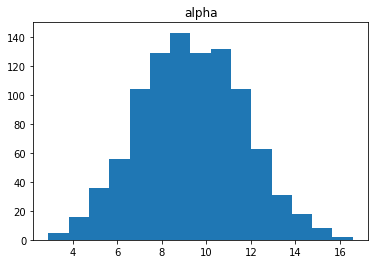

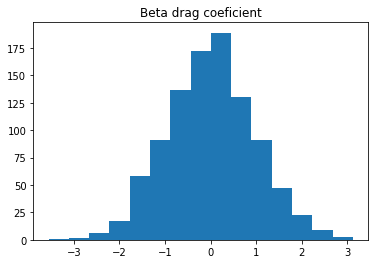

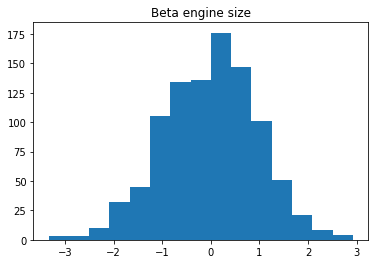

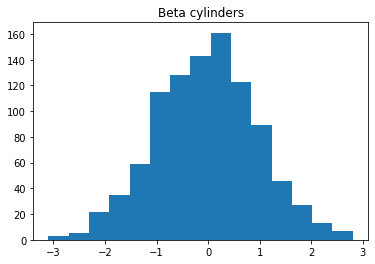

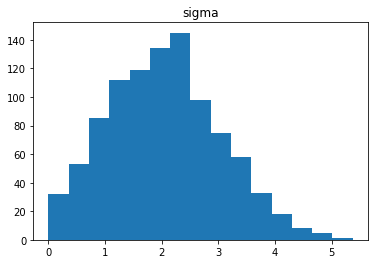

In [228]:
plt.figure(0)
plt.hist(dataFrame_model_2_post.alpha,bins=15)
plt.title('alpha')
plt.figure(1)
plt.hist(dataFrame_model_2_post.beta_drag_coeficient,bins=15)
plt.title('Beta drag coeficient')
plt.figure(2)
plt.hist(dataFrame_model_2_post.beta_engine_size,bins=15)
plt.title('Beta engine size')
plt.figure(3)
plt.hist(dataFrame_model_2_post.beta_cylinders,bins=15)
plt.title('Beta cylinders')
plt.figure(4)
plt.hist(dataFrame_model_2_post.sigma,bins=15)
plt.title('sigma')
plt.show()

In [229]:
def calcQuants(x, y):
    qlvls = [0, 1]
    quansList = [[], []]
    for i in range(y.shape[-1]):
        temp = y[:, i]
        for q, lvl in zip(quansList, qlvls):
            q.append(np.quantile(temp, lvl))
    return quansList

def quantsExtremes(df, y, q):
    engine_uq = df['Engine Size(L)'].unique()
    engine_uq = sorted(engine_uq)
    quansList = calcQuants(df['Engine Size(L)'], y)
    engineQuantDict = dict()
    for engine_val in engine_uq:
        engineList = np.array(df['Engine Size(L)'].tolist())
        idxs = np.where(engineList == engine_val)[0]
        qval = quansList[q][idxs[0]]
        for i in idxs:
            if q == 0 and quansList[q][i] < qval:
                qval = quansList[q][i]
            elif q == 1 and quansList[q][i] > qval:
                qval = quansList[q][i]
        engineQuantDict[engine_val] = qval
    return engineQuantDict

<Figure size 720x432 with 0 Axes>

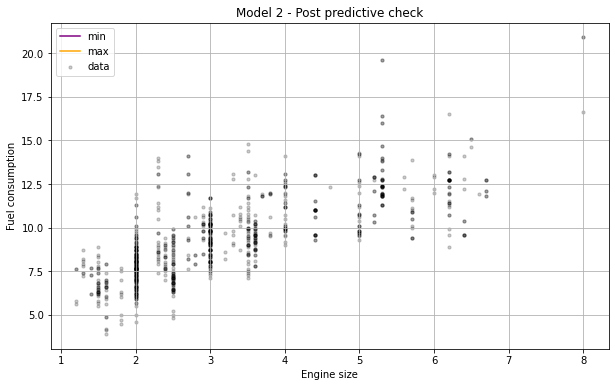

In [230]:
plt.figure(figsize=[10, 6])

price_sim = samples_1_prior.stan_variable('fuel_consumption')

engineQuantMinDict = quantsExtremes(dataFrame, price_sim, 0)
engineMin = (engineQuantMinDict.keys())
quantMin = (engineQuantMinDict.values())

engineQuantMaxDict = quantsExtremes(dataFrame, price_sim, 1)
engineMax = (engineQuantMaxDict.keys())
quantMax = (engineQuantMaxDict.values())

plt.figure(figsize=[10, 6])
plt.plot(engineMin, quantMin, color='purple')
plt.plot(engineMax, quantMax, color='orange')
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'], color='black', alpha=0.2, s=10)
plt.xlabel("Engine size")
plt.ylabel("Fuel consumption")
plt.title("Model 2 - Post predictive check")
plt.legend(['min', 'max', 'data'])
plt.grid()
plt.show()

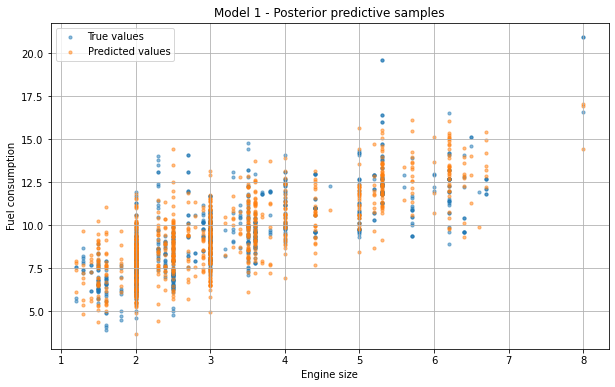

In [231]:

price_sim = samples_1_post.stan_variable('y_out')
plt.figure(figsize=[10,6])
plt.scatter(engine_size_data, fuel_consumption_data, alpha=0.5, s=10)
plt.scatter(engine_size_data, price_sim[0], alpha=0.5, s=10)
plt.title("Model 1 - Posterior predictive samples")
plt.legend(["True values", "Predicted values"])
plt.xlabel("Engine size")
plt.ylabel("Fuel consumption")
plt.grid()
plt.show()

# dataFrame['Fuel Consumption(Hwy (L/100 km))'].plot.density(figsize=(10,6), linewidth=2, color='red')
# samples_1_post['fuel_consumption'].plot.density(figsize=(10,6), linewidth=2, color='red')
# plt.title('Density plot for Price')
# plt.legend(["True values", "Predicted values"])
# plt.grid()
# plt.show()

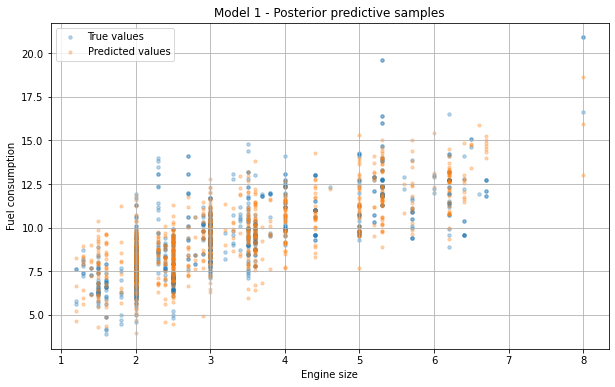

In [232]:

price_sim = samples_2_post.stan_variable('y_out')
plt.figure(figsize=[10,6])
plt.scatter(engine_size_data, fuel_consumption_data, alpha=0.3, s=12)
plt.scatter(engine_size_data, price_sim[0], alpha=0.3, s=10)
plt.title("Model 1 - Posterior predictive samples")
plt.legend(["True values", "Predicted values"])
plt.xlabel("Engine size")
plt.ylabel("Fuel consumption")
plt.grid()
plt.show()

# dataFrame['Fuel Consumption(Hwy (L/100 km))'].plot.density(figsize=(10,6), linewidth=2, color='red')
# for i in range(0,10):
#     price_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
# df_trim.price.plot.density(figsize=(10,6), linewidth=2, color='red')
# plt.title('Density plot for Price')
# plt.legend(["True values", "Predicted values"])
# plt.grid()
# plt.show()

         rank          loo     p_loo      d_loo    weight         se  \
model 2     0 -1632.563722  7.006479   0.000000  0.919169  35.362874   
model 1     1 -1667.904725  5.759407  35.341004  0.080831  34.325226   

               dse  warning loo_scale  
model 2   0.000000    False       log  
model 1  10.189045    False       log  


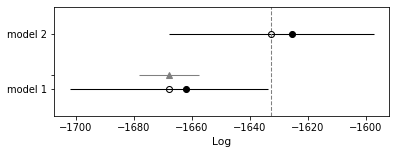

In [233]:
compare=az.compare({'model 1':samples_1_post,'model 2':samples_2_post}, ic='loo')
az.plot_compare(compare)
print(compare)

         rank         waic    p_waic     d_waic    weight         se  \
model 2     0 -1632.545801  6.988558   0.000000  0.919447  35.359084   
model 1     1 -1667.901836  5.756518  35.356035  0.080553  34.324812   

               dse  warning waic_scale  
model 2   0.000000     True        log  
model 1  10.189332     True        log  


/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


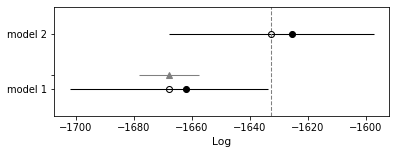

In [234]:
compare=az.compare({'model 1':samples_1_post,'model 2':samples_2_post}, ic='waic')
az.plot_compare(compare)
print(compare)

In [235]:
model_2_post=CmdStanModel(stan_file='Stan_files/model_2_post.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [236]:
samples_2_post = model_2_post.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data, 'fuel_consumption':fuel_consumption_data},
iter_sampling=1,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                   


INFO:cmdstanpy:CmdStan done processing.


In [238]:
dataFrame_model_2_post = samples_2_post.draws_pd()

In [245]:
list = []
for i in range(1,N):
    val = dataFrame_model_2_post['y_out[' + str(i)+ ']'].mean()
    list.append(val)

Text(0.5, 1.0, 'Posterior predictive distribution vs Actual data')

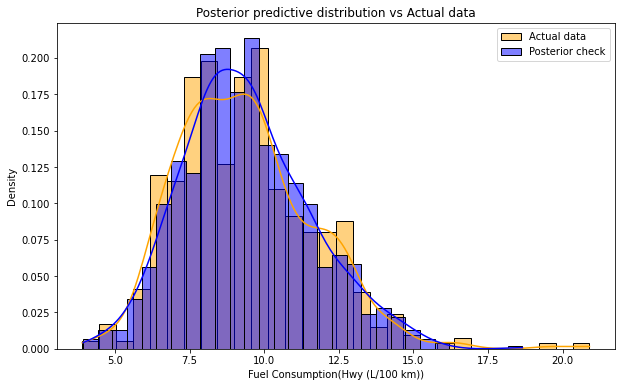

In [254]:
actual_data_flat = fuel_consumption_data
plt.figure(figsize=(10,6))
sns.histplot(actual_data_flat, bins =30, kde=True, stat='density', alpha=0.5,label='Actual data', color='orange')
sns.histplot(list, bins =30, kde=True, stat='density', alpha=0.5,label='Posterior check', color='blue')
plt.legend()
plt.title('Posterior predictive distribution vs Actual data')